In [184]:
import pandas as pd
df = pd.read_csv('contract.csv')
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [185]:
unique_values = df['PaymentMethod'].value_counts()
unique_values

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [186]:
import numpy as np
X = np.array(df[["MonthlyCharges"]])
y_pay = np.array(df[['PaymentMethod']])

In [187]:
y=np.zeros(len(y_pay))
for i in range(len(y)):
    if y_pay[i]=="Electronic check":
        y[i]=0
    elif y_pay[i]=="Mailed check":
        y[i]=1
    elif y_pay[i]=="Bank transfer (automatic)":
        y[i]=2
    elif y_pay[i]=="Credit card (automatic)":
        y[i]=3
print(y)

[0. 1. 1. ... 0. 1. 2.]


In [188]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [189]:
num_test = X_test.shape[0]
num_train = X_train.shape[0]
dists = np.zeros((num_test, num_train))
for i in range(num_test):
    for j in range(num_train):
        dists[i, j] = np.sqrt(np.sum(np.square(X_test[i] - X_train[j])))

In [190]:
dists

array([[33.9 , 49.4 , 19.25, ..., 19.15, 11.25,  1.15],
       [54.85, 70.35, 40.2 , ..., 40.1 ,  9.7 , 19.8 ],
       [20.35,  4.85, 35.  , ..., 35.1 , 65.5 , 55.4 ],
       ...,
       [67.7 , 83.2 , 53.05, ..., 52.95, 22.55, 32.65],
       [29.55, 45.05, 14.9 , ..., 14.8 , 15.6 ,  5.5 ],
       [20.65,  5.15, 35.3 , ..., 35.4 , 65.8 , 55.7 ]])

In [191]:
num_test = dists.shape[0]
y_pred = np.zeros(num_test)
for i in range(num_test):
    closest_indices = np.argsort(dists[i])
    closest_y = y_train[closest_indices]
    closest_y = closest_y.astype(np.int64)
print(closest_y)

[2 1 2 ... 0 0 2]


In [192]:
y_pred=np.zeros(len(X_test))
for i in range(num_test):
    for j in range(num_train):
        if X_test[i]==X_train[j]:
            y_pred[i]=closest_y[j]

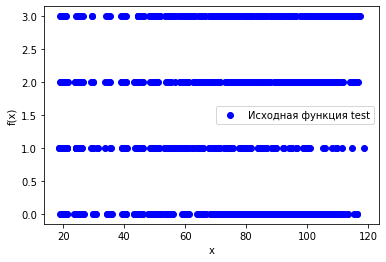

In [193]:
import matplotlib.pyplot as plt
plt.plot(X_test,  y_test, 'bo', label='Исходная функция test')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

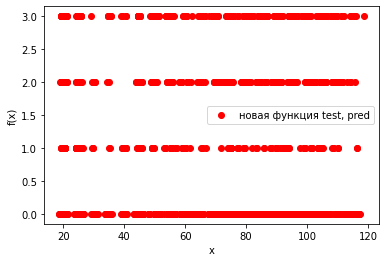

In [194]:
plt.plot(X_test,  y_pred, 'ro', label='новая функция test, pred')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

In [195]:
zer=0
one=0
two=0
three=0
for l in range(len(y_pred)):
    if y_pred[l]==0:
        zer+=1
    elif y_pred[l]==1:
        one+=1
    elif y_pred[l]==2:
        two+=1
    elif y_pred[l]==3:
        three+=1
print(zer,one,two,three)

836 149 344 432


In [197]:
zer=0
one=0
two=0
three=0
for l in range(len(y_test)):
    if y_test[l]==0:
        zer+=1
    elif y_test[l]==1:
        one+=1
    elif y_test[l]==2:
        two+=1
    elif y_test[l]==3:
        three+=1
print(zer,one,two,three)

591 403 386 381


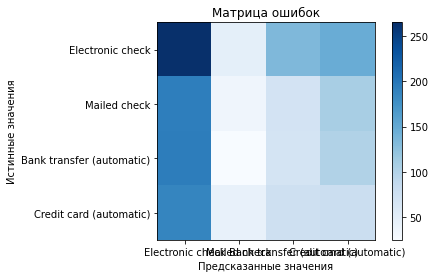

In [200]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Матрица ошибок')
plt.colorbar()
classes=['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Предсказанные значения')
plt.ylabel('Истинные значения')
plt.show()

In [201]:
"""
Расчитаем с минимума tpr и fpr, вообще лучше имет predict_proba где данные имеют вид 0,9 | 0,1 
это будет вероятность принадлежности к тому или иному классую.
Посчитаем с минимального fpr и будем идти выше, сделано чтобы было похоже на кривую ROC Curve
То есть по факту я должен был получить predict_proba составить такой же график который будет представлен ниже.
В графике ниже будет показан график ROC кривой для всех данных по которым мы делали predict.
Чем график выше, тем лучше наши результаты.
"""

'\nРасчитаем с минимума tpr и fpr, вообще лучше имет predict_proba где данные имеют вид 0,9 | 0,1 \nэто будет вероятность принадлежности к тому или иному классую.\nПосчитаем с минимального fpr и будем идти выше, сделано чтобы было похоже на кривую ROC Curve\nТо есть по факту я должен был получить predict_proba составить такой же график который будет представлен ниже.\nВ графике ниже будет показан график ROC кривой для всех данных по которым мы делали predict.\nЧем график выше, тем лучше наши результаты.\n'

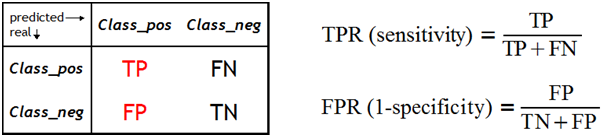

In [204]:
tprE=250/(250+20+100+130)
fprE=(170*3)/((170*3)+(5+20+50+50+100+80))
tprM=50/(50+160+40+80)
fprM=(20+10+10)/((20+10+10)+(250+170+150+60+40+40+100))
tprT=80/(80+10+100+150)
fprT=(50+40+100)/((50+40+100)+250+170+150+120+330)
tprC=50/(50+40+20+150)
fprC=(330)/(330+250+330+120)
print(tprE,fprE,tprM,fprM,tprT,fprT,tprC,fprC)

0.5 0.6257668711656442 0.15151515151515152 0.047058823529411764 0.23529411764705882 0.15702479338842976 0.19230769230769232 0.32038834951456313


In [207]:
func1=[tprM,tprC,tprT,tprE]
func2=[fprM,fprC,fprT,fprE]

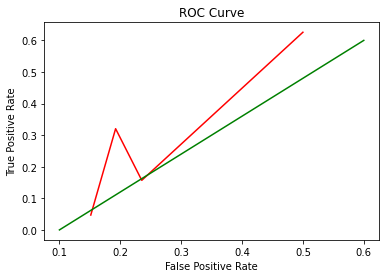

In [213]:
plt.plot(func1, func2, color='red')
plt.plot([0.1,0.6],[0,0.6],color='green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

на этом графике можно увидеть плохую классификацию классов Mailed check и Credit card (automatic). 
Более менее угадали Bank transfer (automatic). и наилучший показатель показал Electronic check.
Исходя из данных, у нас получились плохие результыты потому что в наилучшем случае The Positive Rate должен стремится к 1
а от False Positive Rate у нас сильно ничего не зависит, это просто показатель.
Думаю в данной задаче это наилучший результат т.к не понятно по чему вообще классифицировать, данные расходятся и сходятся
не равномерно и если бы угадывал человек, возможно, шанс был бы 25%.